# Statistical process of experimental measurements

## 1. Description of the data
In our lab some measurements of local velocity were made with a CTA probe (see for example the [Wikipedia page for hot-wire anemometry](https://en.wikipedia.org/wiki/Anemometer#Hot-wire_anemometers), or the [Dantec information](https://www.dantecdynamics.com/solutions-applications/solutions/fluid-mechanics/constant-temperature-anemometry-cta/measurement-principles-of-cta/))

The measurements were performed in the wake behind a NACA profile with 5 degrees incidence angle

![image.png](profileWake.png)

The data provided have been acquired at a distance of, approximately, $\frac{x}{c} \approx 1.1$, where $c = 265 \,\text{mm}$ is the profile's chord. and there are 17 $y$ positions, 
from $y=-4 \,\text{cm}$ to $y=+4 \,\text{cm}$, in intervals of 5 mm. In each point the velocity has been acquired for a second with a frequency of 1 kHz (that is, 1000 velocities in each point). It has been measured only the $x$ component (main flow direction).

Most of the topics covered in this notebook have been consulted in the [CFD-online Wiki page "Introduction to turbulence"](https://www.cfd-online.com/Wiki/Introduction_to_turbulence)

In [1]:
import pandas as pd
import numpy as np

We define the names for the columns, according with the definition

In [2]:
columns = []
for i in range(17):
    y = (i-8)*5
    columns.append("y = "+str(y)+"mm")

In [3]:
turbulenceData = pd.read_csv('TurbVel.csv',delimiter=',', index_col=0,names=columns)

In [4]:
turbulenceData.index.name="Time"

In [5]:
turbulenceData.head()

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
Time,,,,,,,,,,,,,,,,,
0.000,20.916005,21.013892,19.890369,20.564816,19.247617,20.242762,20.171834,19.326923,17.711748,17.954515,19.112384,19.247617,18.955669,19.624038,18.989162,20.337691,17.901476
0.001,20.757920,21.124463,19.878740,20.528820,19.258909,20.278330,20.124676,19.417902,16.314876,17.534186,19.213710,19.292888,18.922264,19.704760,18.833365,20.313920,17.743229
0.002,20.661140,21.087559,20.101135,20.492846,19.213710,20.337691,20.136438,19.360977,13.902128,18.590930,19.202443,19.349631,18.933382,19.716296,18.601871,20.254624,17.922668
0.003,20.794288,21.099841,20.207287,20.421109,19.315560,20.219094,20.124676,19.349631,12.840679,18.340470,19.281544,19.372364,18.955669,19.785785,18.503472,20.278330,17.471901
0.004,20.952667,21.099841,20.349604,20.480892,19.292888,20.313920,20.148242,19.326923,15.086783,18.243283,19.247617,19.349631,18.944540,19.785785,17.838033,20.195451,18.135857


If we want to save this data in another file, keeping the information for index, columns, etc... instead of csv, we can use a more powerful format, as HDF. This is a Hierarchical Data Format, widely used to store big amounts of data in a organized way. More information, in the [HDF group web page](https://www.hdfgroup.org/solutions/hdf5) or in [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

:::{warning}
In ordert to save as HDF you will need the [pytables](https://www.pytables.org/index.html) module installed.

Just run 
> pip install tables

:::

In [6]:
turbulenceData.to_hdf("TurbVel.hdf","w")

We can then get again the data with the format provided

In [7]:
newTurbulenceData = pd.read_hdf("TurbVel.hdf")

In [8]:
newTurbulenceData

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
Time,,,,,,,,,,,,,,,,,
0.000,20.916005,21.013892,19.890369,20.564816,19.247617,20.242762,20.171834,19.326923,17.711748,17.954515,19.112384,19.247617,18.955669,19.624038,18.989162,20.337691,17.901476
0.001,20.757920,21.124463,19.878740,20.528820,19.258909,20.278330,20.124676,19.417902,16.314876,17.534186,19.213710,19.292888,18.922264,19.704760,18.833365,20.313920,17.743229
0.002,20.661140,21.087559,20.101135,20.492846,19.213710,20.337691,20.136438,19.360977,13.902128,18.590930,19.202443,19.349631,18.933382,19.716296,18.601871,20.254624,17.922668
0.003,20.794288,21.099841,20.207287,20.421109,19.315560,20.219094,20.124676,19.349631,12.840679,18.340470,19.281544,19.372364,18.955669,19.785785,18.503472,20.278330,17.471901
0.004,20.952667,21.099841,20.349604,20.480892,19.292888,20.313920,20.148242,19.326923,15.086783,18.243283,19.247617,19.349631,18.944540,19.785785,17.838033,20.195451,18.135857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.995,21.087559,21.248015,19.349631,20.007225,19.785785,19.832212,19.612552,18.844470,17.010890,18.877784,17.234927,19.937022,20.373413,18.800155,17.451182,18.922264,19.808986
0.996,21.013892,21.334855,19.474945,19.972095,19.774176,19.855463,19.601036,18.844470,16.960352,18.082340,17.513403,20.183621,20.148242,18.800155,17.440815,19.532177,20.207287
0.997,21.050677,21.310005,19.440708,20.054129,19.704760,19.867080,19.578058,18.888878,16.373577,18.623839,17.680285,19.960385,20.148242,18.329634,17.461523,19.797365,20.160017


In [9]:
del(newTurbulenceData)

We can easily plot velocity time series in any point

<AxesSubplot:xlabel='Time', ylabel='u'>

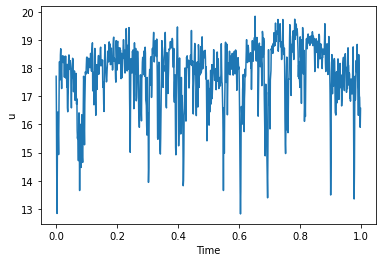

In [10]:
turbulenceData["y = 0mm"].plot(ylabel="u")

And also we can get the main features

In [11]:
statData = turbulenceData.describe()
statData

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.104367,21.044473,20.757320,20.316435,20.247308,20.270573,19.733937,19.493431,17.798975,17.059820,19.138614,19.377307,19.330135,19.228752,19.026175,19.121565,18.570242
std,0.187226,0.228523,0.762061,0.776583,0.536762,0.262442,0.251107,0.491538,1.124547,0.988907,0.305786,0.354726,0.462051,0.478166,0.694788,0.662401,0.860208
min,20.468907,20.207287,18.634798,18.866662,19.123603,19.704760,19.168608,18.297226,12.824605,13.765816,17.234927,17.764286,17.245155,17.265657,16.373577,16.511184,16.101291
25%,20.989390,20.989390,20.322845,19.751012,19.797365,20.065853,19.566596,19.075895,17.327294,16.491465,18.977981,19.213710,19.109572,18.989162,18.678760,18.722815,17.983749
50%,21.099841,21.112168,20.733695,20.225018,20.272393,20.219094,19.704760,19.532177,18.071674,17.173579,19.168608,19.440708,19.338256,19.258909,19.045057,19.258909,18.689782
75%,21.173826,21.186155,21.062977,20.624988,20.676252,20.492846,19.913683,19.937022,18.569031,17.774791,19.315560,19.601036,19.658606,19.520739,19.477807,19.601036,19.227838
max,21.647802,21.447038,23.727658,23.157105,21.774209,20.842895,20.361487,20.661140,19.843817,19.727874,20.077620,20.230943,20.721574,20.444995,20.830752,20.337691,20.492846


<AxesSubplot:title={'center':'Mean velocities'}>

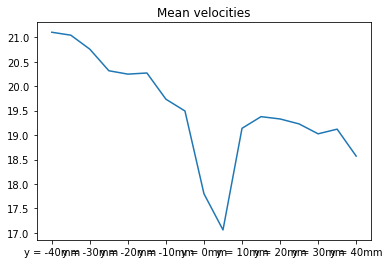

In [12]:
statData.loc["mean"].plot(title="Mean velocities")

## 2. Computation of turbulence intensities

Remember the definition of turbulence intensity: 

$$ I = \frac{\sqrt{\overline{u'^2}}}{\bar{u}} \tag{1} $$

where the numerator is, precisely, the `std` index of our statistical data.

In [13]:
turbIntensity = statData.loc["std"]/statData.loc["mean"]

<AxesSubplot:title={'center':'Turbulence Intensity'}>

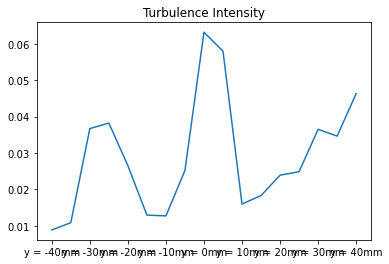

In [14]:
turbIntensity.plot(title="Turbulence Intensity")

## 3. Computation of fluctuations

By definition, in each point the fluctuation of velocity is 

$$ u' = u  - \overline{u} \tag{2}$$

In [15]:
turbVelFluct = turbulenceData-statData.loc["mean"]

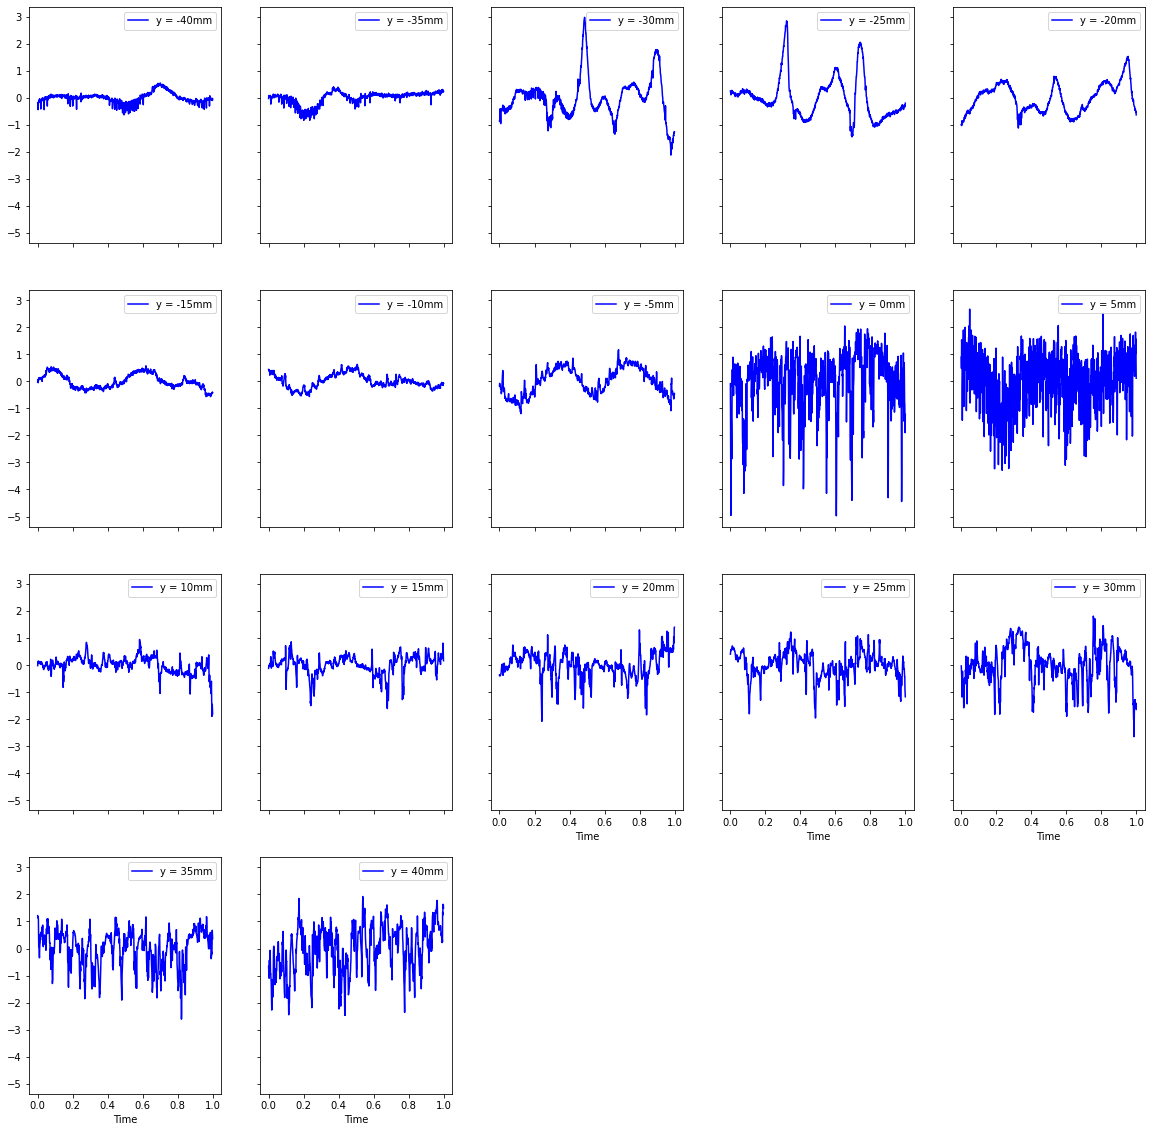

In [16]:
turbVelFluct.plot(subplots=True,layout=(4,5),figsize=(20,20),color="b",sharey=True);

## 4. Computation of turbulence kinetic energy

The turbulent kinetic energy (TKE), $k$ is computed as

$$ k = \frac{1}{2}\overline{\boldsymbol{u'}\cdot\boldsymbol{u'}} = \frac{1}{2} \overline{u'_i u'_i} \tag{3}$$

and we should need also $v'$ and $w'$. We are then only computing the contribution of $u'$ to TKE. Note that although main flow is in the $x$ direction and components of velocities $u$ and $v$ can be neglected, it is not possible for fluctuating velocities $v'$ and $w'$. They can be as important as $u'$. We can make the assumption that turbulence, at small scales, is isotropic and, hence $\overline{u'}^2 \approx \overline{v'}^2 \approx \overline{w'}^2 $ and

$$ k \approx \frac{3}{2}\overline{u'}^2 \tag{4}$$

In [17]:
TKE = 1.5*statData.loc["std"]**2

<AxesSubplot:>

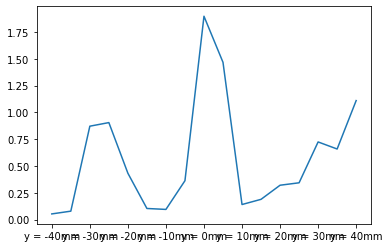

In [18]:
TKE.plot()

## 5. Some time scales

For the moment, we focus on $y = 0 \,\text{mm}$ time series. The TKE in this point is

In [19]:
k = TKE.loc["y = 0mm"]
k

1.8969099438209787

The turbulence Reynolds number, locally defined in this point, is calculated with a length scale, which can be estimated, for now, as the larger eddy in the flow, of the order of the profile's chord. 

$$ \text{Re}_t = \frac{\sqrt{k}c}{\nu} \tag{5}$$

We need also the viscosity of air.

In [20]:
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(k)*c/nu
print('Re_t = {:.5g}'.format(Re_t))

Re_t = 24332


The [Kolmogorov time scale](https://en.wikipedia.org/wiki/Kolmogorov_microscales) can be estimated as

$$ \tau_k = \sqrt{\frac{\nu}{\varepsilon}} \tag{6}$$

where $\varepsilon$ is the energy dissipation rate, that can be estimated as 

$$ \varepsilon = \frac{k^{\frac{3}{2}}}{c} \tag{7}$$ 

(it is considered that energy is injected at larger scales)

In [21]:
epsilon = k**1.5/c
epsilon # m^2/s^3

9.858803164295542

And the Kolmogorov time scale is, approximately,

In [22]:
tau_k = np.sqrt(nu/epsilon)
tau_k

0.0012334840317132275

that is of the order of our time resolution.

An integral time scale is defined with the autocorrelation of time signal. 

$$ R(\tau) = \overline{u'(t)u'(t+\tau)} \tag{8}$$

Computing autocorrelation is very time consuming, but pandas has a [plotting method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.autocorrelation_plot.html) that performs this computation much faster. The problem is that the output is directly a plot, and it is tricky to get the autocorrelation values from it.

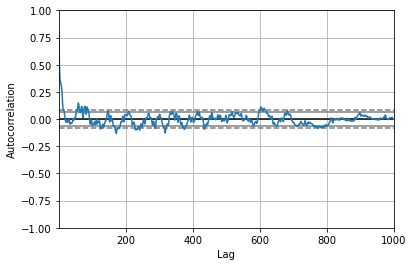

In [23]:
uPrime = turbVelFluct["y = 0mm"].values
pd.plotting.autocorrelation_plot(uPrime);

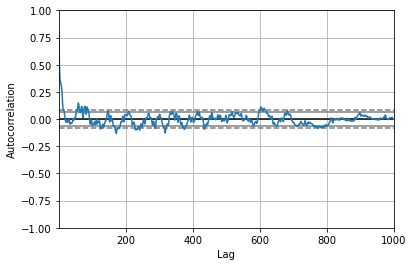

In [24]:
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()

We change the "lag" $x$ numbers with time lag, form the Data Frame

In [25]:
autocorr[:,0]=turbVelFluct.index.values

And also zoom for a narrower $x$ span. Note that the pandas function gives the normalized correlation $\rho(\tau)=\frac{R(\tau)}{R(0)} $.

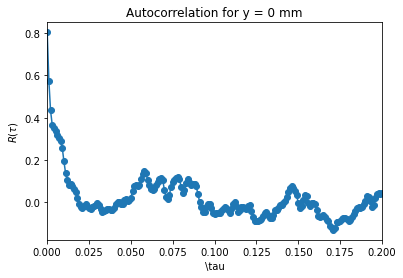

In [26]:
import matplotlib.pyplot as plt
plt.plot(autocorr[:,0],autocorr[:,1],'o-')
ax = plt.gca()
ax.set_xlim(0,0.2)
ax.set_ylabel(r"$R(\tau)$")
ax.set_xlabel(r"\tau")
ax.set_title("Autocorrelation for y = 0 mm");

The integral time scale is defined as the integral of autocorrelation function

In [27]:
from scipy import integrate
T = integrate.trapezoid(autocorr[:,1],autocorr[:,0])
T

-0.0009022706750520157

It gives a very small (negative) value because the number of samples (1000) is still very low to get a good autocorrelation for large lag. It is assumed that after the second or third root, the autocorrelation is zero. So, we change the limits of integration:

In [28]:
T = integrate.trapezoid(autocorr[0:50,1],autocorr[0:50,0])
T

0.0038772428514055016

This method has the inconvenient that there is not the lag 0. It should be included in the very first point.

Alternatively, the statistic models package provides a better way to estimate autocorrelation, even with the option of choosing the number of lags for the computation.

In [29]:
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=50,fft=False)
rho

array([ 1.00000000e+00,  8.04541350e-01,  5.73932067e-01,  4.34197820e-01,
        3.66033657e-01,  3.52249759e-01,  3.37537587e-01,  3.17333281e-01,
        3.02811025e-01,  2.88497039e-01,  2.57130409e-01,  1.92849680e-01,
        1.36546784e-01,  1.03957571e-01,  8.32353264e-02,  8.38373665e-02,
        7.86032962e-02,  6.10277646e-02,  4.65580669e-02,  1.99746693e-02,
       -9.26964982e-03, -2.42545223e-02, -2.72775430e-02, -1.88646766e-02,
       -9.32923832e-03, -1.87112884e-02, -2.96367351e-02, -3.06195932e-02,
       -2.30782249e-02, -1.88316863e-02, -1.35537818e-02, -3.97915265e-03,
       -1.47696686e-02, -3.43907404e-02, -4.63080674e-02, -4.27395164e-02,
       -3.48795246e-02, -3.31582168e-02, -3.40160661e-02, -3.72166240e-02,
       -3.81736376e-02, -2.71323604e-02, -7.79263410e-03,  2.27309238e-03,
        5.12746823e-04, -1.00859193e-02, -1.05058317e-02,  9.75072762e-03,
        1.29933159e-02,  7.25182676e-03,  8.90439779e-03])

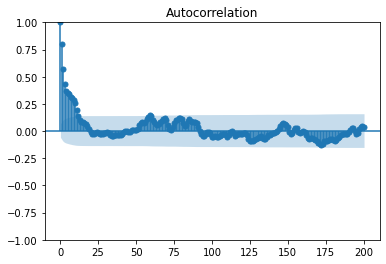

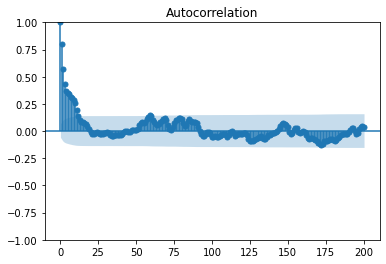

In [30]:
import statsmodels.graphics.api as smg
smg.tsa.plot_acf(uPrime,lags=200,fft=False)

The computation of the integral time is more accurate because of the 0-lag point.

In [31]:
T = integrate.trapezoid(rho[0:50],autocorr[0:50,0])
T

0.004771435414182847

## 6. Histogram and PDF

PDF is the Probability Density Function. It defines the probability of an event between to values. For example, if the pdf of our velocity fluctuation is  $f(x)$, then the probability that a value of the fluctuation lies between $u'_1$ and $u'_2$ is 

$$ P\left(u'_1 < u' < u'_2\right) = \int_{u'_1}^{u'_2} f(x) \text{d}x \tag{9}$$ 

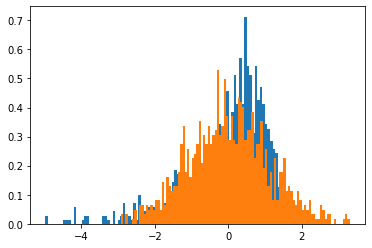

In [32]:
import scipy.stats as stats
X = stats.norm(0,statData["y = 0mm"].loc["std"])
X_samples= X.rvs(1000)
F, bins, patches = plt.hist(uPrime,bins=100,density=True) # Integral = 1
plt.hist(X_samples,bins=100,density=True);

Since we have included the option `density=True`, the integral (moment of order 0) of this PDF is 1.

$$ M_0 = \int_{-\infty}^{+\infty} f(u') \text{d}u' = 1 \tag{10}$$

In [33]:
deltaUPrime = np.diff(bins) 
M0 = np.sum(F*deltaUPrime)
M0

1.0

The moment of order $n$ is defined as

$$ M_n = \int_{-\infty}^{+\infty} u'^n f(u') \text{d}u' \tag{11}$$

The moment of order 1 is the average of the samples, that should be 0

$$ M_1 = \overline{u'} = \int_{-\infty}^{+\infty} u' f(u') \text{d}u' = 0 \tag{12}$$

In [34]:
UPrimePDF = bins[:-1] + deltaUPrime/2
UPrimePDF
M1 = np.sum(UPrimePDF*F*deltaUPrime)
M1

-0.00034572943200417974

The moment of order 2 is the variance of the samples, that should be the square of the standard deviation given by pandas before...

$$ M_2 = \overline{u'^2} = \int_{-\infty}^{+\infty} u'^2 f(u') \text{d}u' \tag{13}$$

In [35]:
M2 = np.sum(UPrimePDF**2*F*deltaUPrime)
M2

1.2646119129824565

We can check it easily with the statistical data

In [36]:
statData["y = 0mm"].loc["std"]**2

1.2646066292139857

The moment of order 3 is 

$$ M_3 = \overline{u'^3} = \int_{-\infty}^{+\infty} u'^3 f(u') \text{d}u' \tag{14}$$

The _skewness_ of the $u'$ distribution is defined as 

$$ S = \frac{M_3}{M_2^\frac{3}{2}} \tag{15}$$

In [37]:
M3 = np.sum(UPrimePDF**3*F*deltaUPrime)
M3

-1.9216881739273899

In [38]:
S = M3/M2**1.5
S

-1.3512851823741956

The moment of order 4 is 

$$ M_4= \overline{u'^4} = \int_{-\infty}^{+\infty} u'^4 f(u') \text{d}u' \tag{16}$$

The _kurtosis_ of the $u'$ distribution is defined as 

$$ K = \frac{M_4}{M_2^2} \tag{17}$$

For a normal distribution, it should be 3 (check it)

In [39]:
M4 = np.sum(UPrimePDF**4*F*deltaUPrime)
M4

8.337551070336458

In [40]:
K = M4/M2**2
K

5.213435079007364

## 7. Power spectrum

Finally, from the time series signal, we can get the spectrum in frequency by performing a [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) 

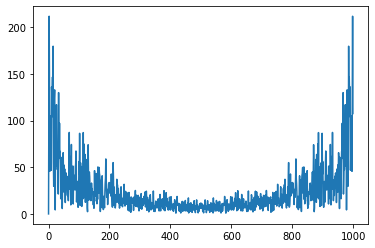

In [41]:
E = np.abs(np.fft.fft(uPrime))
plt.plot(E);

We compute the frequencies range, providing the periode of the data acquisition

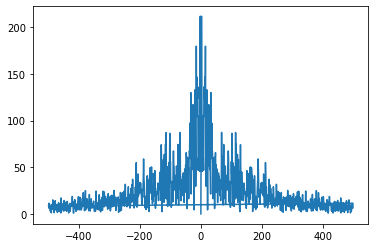

In [42]:
freq = np.fft.fftfreq(uPrime.size,0.001)
plt.plot(freq,E);

and we keep only half the data, since it is symmetric

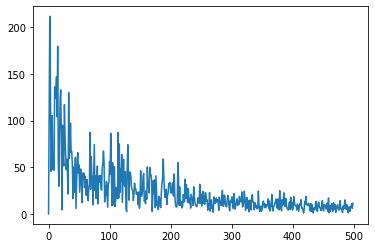

In [43]:
E = E[:len(E)//2]
freq = freq[:len(freq)//2]
plt.plot(freq,E);

and, finally, we compute the energy, which is the square of the velocity

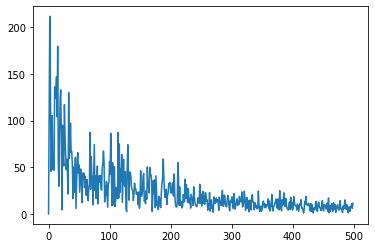

In [44]:
P = E**2
plt.plot(freq,E)

Let's plot it in a log-log graph with the [-5/3 Kolmogorov's law](https://physics.stackexchange.com/questions/13161/physical-explanation-for-kolmogorov-5-3-spectrum-in-fluid-mechanics) as a reference line for the energy decay in frequency 

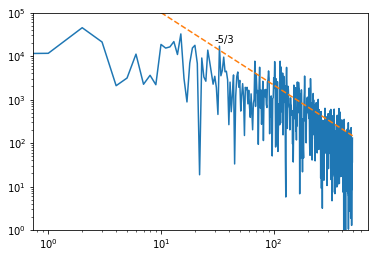

In [45]:
fig, ax = plt.subplots(1)
ax.set_ylim(1,1e5)
ax.loglog(freq,P)
f_plot = np.logspace(1,2.7,100)
f_ref = 10 #Just a Frequancy and Energy of reference for the -5/3 law
P_ref = 1e5
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(30,20000,'-5/3');

This spectrum can also be computed via the velocity autocorrelation

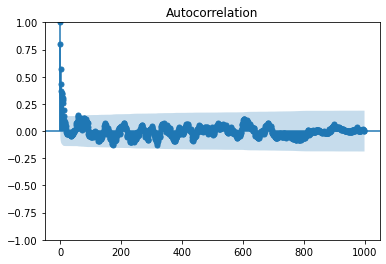

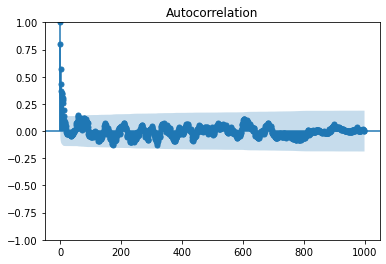

In [46]:
rho = sm.tsa.acf(uPrime,nlags=999,fft=False)
smg.tsa.plot_acf(uPrime,lags=999,fft=False)

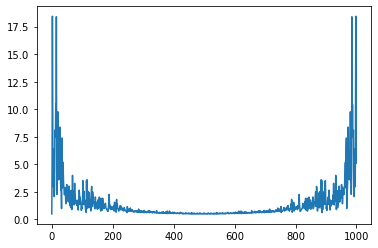

In [47]:
Pr = np.abs(np.fft.fft(rho))
plt.plot(Pr);

In [48]:
freq = np.fft.fftfreq(rho.size,0.001)
Pr = E[:int(len(Pr)/2)]**2
freq = freq[:int(len(freq)/2)]

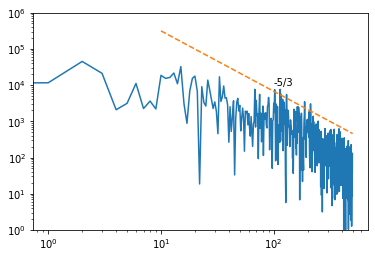

In [49]:
fig, ax = plt.subplots(1)
ax.set_ylim(1,1e6)
ax.loglog(freq,Pr)
f_plot = np.logspace(1,2.7,100)
f_ref = 30
P_ref = 50000
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(100,10000,'-5/3');

In [50]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.0-113-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

numpy      : 1.21.5
pandas     : 1.4.2
matplotlib : 3.5.1
statsmodels: 0.13.2
scipy      : 1.7.1

